<a href="https://colab.research.google.com/github/IsaacGreenMachine/holbertonschool-machine_learning/blob/main/0x00_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [7]:
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
sess = tf.Session()

# Functions

In [26]:
# Task 0 : Placeholders
def create_placeholders(nx, classes):
    """creates two tf placeholders for num. examples and num. classes"""
    x = tf.placeholder(tf.float32, shape=(None, nx), name="x")
    y = tf.placeholder(tf.float32, shape=(None, classes), name="y")
    return x, y

# Task 1 : Layers
def create_layer(prev, n, activation):
    """creates a tf layer with n inputs and activation func"""
    weights = tf.contrib.layers.variance_scaling_initializer(mode="FAN_AVG")
    return tf.layers.dense(prev, n,
                           activation=activation,
                           kernel_initializer=weights)

# Task 2 : Forward Propagation
def forward_prop(x, layer_sizes=[], activations=[]):
    """creates neural network for forward prop"""
    create_layer = __import__('1-create_layer').create_layer
    prev = x
    for i in range(len(layer_sizes)):
        lay = create_layer(prev, layer_sizes[i], activations[i])
        prev = lay(prev)
    return prev

# Task 3 : Accuracy
def calculate_accuracy(y, y_pred):
    """creates tf graph struct for calculating accuracy"""
    ymax = tf.argmax(y, axis=1)
    predmax = tf.argmax(y_pred, axis=1)
    return tf.reduce_mean(tf.cast(tf.math.equal(ymax, predmax),
                          tf.float32))

# Task 4 : Loss
def calculate_loss(y, y_pred):
    """creates tensor for calculating loss"""
    return tf.losses.softmax_cross_entropy(y, y_pred)

# Task 5 : Train_op
def create_train_op(loss, alpha):
    """creates tensor to train with gradient descent"""
    optimizer = tf.train.GradientDescentOptimizer(alpha)
    return optimizer.minimize(loss)

# Task 6 : Train
def train(X_train, Y_train, X_valid, Y_valid, layer_sizes,
          activations, alpha, iterations, save_path="/tmp/model.ckpt"):
    """trains a tf neural net for x iterations, saves tf format"""
    x, y = create_placeholders(X_train.shape[1], Y_train.shape[1])
    sess = tf.Session()
    y_pred = forward_prop(x, layer_sizes, activations)
    loss = calculate_loss(y, y_pred)
    accuracy = calculate_accuracy(y, y_pred)
    train_op = create_train_op(loss, alpha)
    init = tf.global_variables_initializer()
    tf.add_to_collection('x', x)
    tf.add_to_collection('y', y)
    tf.add_to_collection('y_pred', y_pred)
    tf.add_to_collection('loss', loss)
    tf.add_to_collection('accuracy', accuracy)
    tf.add_to_collection('train_op', train_op)
    sess.run(init)
    for i in range(iterations+1):
        if i % 100 == 0 or i == iterations:
            tLoss, tAccuracy = sess.run((loss, accuracy),
                                        feed_dict={x: X_train, y:  Y_train})
            vLoss, vAccuracy = sess.run((loss, accuracy),
                                        feed_dict={x: X_valid, y: Y_valid})
            print("After {} iterations:".format(i))
            print("\tTraining Cost: {}".format(tLoss))
            print("\tTraining Accuracy: {}".format(tAccuracy))
            print("\tValidation Cost: {}".format(vLoss))
            print("\tValidation Accuracy: {}".format(vAccuracy))
        if i < iterations:
            sess.run((train_op), feed_dict={x: X_train, y: Y_train})
    saver = tf.train.Saver()
    return saver.save(sess, save_path)

# Task 7 : Evaluate
def evaluate(X, Y, save_path):
    """loads tf network from file, evaluates for x and y"""
    sess = tf.Session()
    saver = tf.train.import_meta_graph(save_path + '.meta')
    saver.restore(sess, save_path)
    x = tf.get_collection('x')[0]
    y = tf.get_collection('y')[0]
    pred = tf.get_collection('y_pred')[0]
    acc = tf.get_collection('accuracy')[0]
    loss = tf.get_collection('loss')[0]
    vars = sess.run([pred, acc, loss], feed_dict={x: X, y: Y})
    return vars[0], vars[1], vars[2]

    

# Mains

##Task 0 - Placeholders

In [ ]:
x, y = create_placeholders(784, 10)
print(x)
print(y)
# test values:
xvals = np.random.normal(size=(1,784))
yvals = np.random.normal(size=(1,10))
print(sess.run((x, y), feed_dict={x:xvals, y:yvals}))

## Task 1 - Layers

In [ ]:
x, y = create_placeholders(784, 10)
l = create_layer(x, 256, tf.nn.tanh)
print(l)
print(sess.run())

## Task 2. Forward Propagation

In [ ]:
x, y = create_placeholders(784, 10)
y_pred = forward_prop(x, [256, 256, 10], [tf.nn.tanh, tf.nn.tanh, None])
print(y_pred)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Tensor("layer_2/BiasAdd:0", shape=(?, 10), dtype=float32)


## Task 3. Accuracy

labels:

[[4][4][7][7]]

data:

[[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [4, 5, 6, 7]]

->

[[4][5][6][7]]

compare:

[[y][n][n][y]]

avg:

50% = 0.5

In [ ]:
sess = tf.Session()
x, y = create_placeholders(784, 10)
y_pred = forward_prop(x, [256, 256, 10], [tf.nn.tanh, tf.nn.tanh, None])
accuracy = calculate_accuracy(y, y_pred)
print(accuracy)


Tensor("Mean:0", shape=(), dtype=float32)


## Task 4. Loss

[softmax function doc](https://www.tensorflow.org/api_docs/python/tf/compat/v1/losses/softmax_cross_entropy)

In [ ]:
x, y = create_placeholders(784, 10)
y_pred = forward_prop(x, [256, 256, 10], [tf.nn.tanh, tf.nn.tanh, None])
loss = calculate_loss(y, y_pred)
print(loss)

## Task 5. Train_Op

In [ ]:
x, y = create_placeholders(784, 10)
y_pred = forward_prop(x, [256, 256, 10], [tf.nn.tanh, tf.nn.tanh, None])
loss = calculate_loss(y, y_pred)
train_op = create_train_op(loss, 0.01)
print(train_op)

## Task 6. Train

In [27]:
def one_hot(Y, classes):
  """convert an array to a one-hot matrix"""
  one_hot = np.zeros((Y.shape[0], classes))
  one_hot[np.arange(Y.shape[0]), Y] = 1
  return one_hot


lib= np.load('/content/testing data/MNIST.npz')
X_train_3D = lib['X_train']
Y_train = lib['Y_train']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1))
Y_train_oh = one_hot(Y_train, 10)
X_valid_3D = lib['X_valid']
Y_valid = lib['Y_valid']
X_valid = X_valid_3D.reshape((X_valid_3D.shape[0], -1))
Y_valid_oh = one_hot(Y_valid, 10)

layer_sizes = [256, 256, 10]
activations = [tf.nn.tanh, tf.nn.tanh, None]
alpha = 0.01
iterations = 1000

tf.set_random_seed(0)
save_path = train(X_train, Y_train_oh, X_valid, Y_valid_oh, layer_sizes,
                  activations, alpha, iterations, save_path="./model.ckpt")
print("Model saved in path: {}".format(save_path))

After 0 iterations:
	Training Cost: 2.6359012126922607
	Training Accuracy: 0.09102000296115875
	Validation Cost: 2.650632381439209
	Validation Accuracy: 0.0828000009059906
After 100 iterations:
	Training Cost: 0.8158776760101318
	Training Accuracy: 0.7893800139427185
	Validation Cost: 0.7685322165489197
	Validation Accuracy: 0.8162000179290771
After 200 iterations:
	Training Cost: 0.5992170572280884
	Training Accuracy: 0.8417800068855286
	Validation Cost: 0.5496141314506531
	Validation Accuracy: 0.8628000020980835
After 300 iterations:
	Training Cost: 0.5124558806419373
	Training Accuracy: 0.8614199757575989
	Validation Cost: 0.465472936630249
	Validation Accuracy: 0.8812999725341797
After 400 iterations:
	Training Cost: 0.46345987915992737
	Training Accuracy: 0.8730999827384949
	Validation Cost: 0.4194927215576172
	Validation Accuracy: 0.8907999992370605
After 500 iterations:
	Training Cost: 0.43095147609710693
	Training Accuracy: 0.8808199763298035
	Validation Cost: 0.389758974313735

ValueError: ignored

##Task 7 : Evaluate

INFO:tensorflow:Restoring parameters from /content/model.ckpt
Test Accuracy: 0.9067
Test Cost: 0.33444288


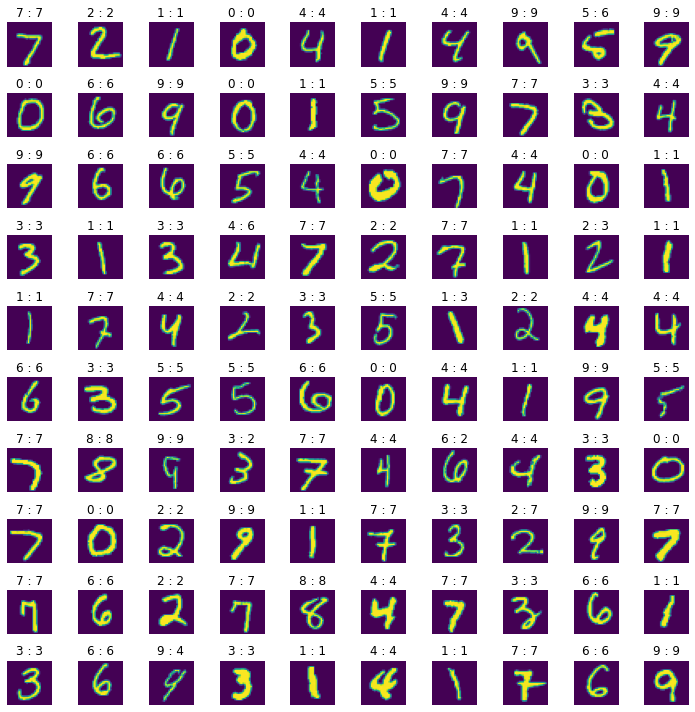

In [25]:
def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    one_hot = np.zeros((Y.shape[0], classes))
    one_hot[np.arange(Y.shape[0]), Y] = 1
    return one_hot


lib= np.load('/content/testing data/MNIST.npz')
X_test_3D = lib['X_test']
Y_test = lib['Y_test']
X_test = X_test_3D.reshape((X_test_3D.shape[0], -1))
Y_test_oh = one_hot(Y_test, 10)

Y_pred_oh, accuracy, cost = evaluate(X_test, Y_test_oh, '/content/model.ckpt')
print("Test Accuracy:", accuracy)
print("Test Cost:", cost)

Y_pred = np.argmax(Y_pred_oh, axis=1)

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_test_3D[i])
    plt.title(str(Y_test[i]) + ' : ' + str(Y_pred[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

# Show Graph

In [ ]:
writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())
writer.flush()
%reload_ext tensorboard
%load_ext tensorboard
%tensorboard --logdir .